Total amino acid residues in protein == 591
Total charged residues are: 117
117 [3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] [] [2, 2, 2, 2, 2, 2]
Total fraction helix 0.32
Total fraction beta 0.15
Total fraction other structures 0.53
**It should generate 1 png, 2 dat (aa_vs_secst.dat and mist.dat) files
ALL DONE


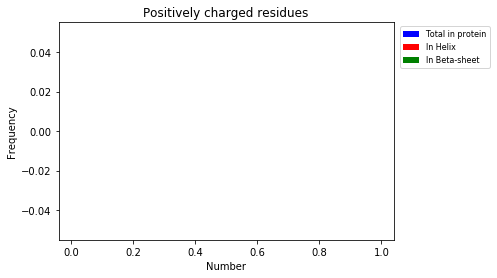

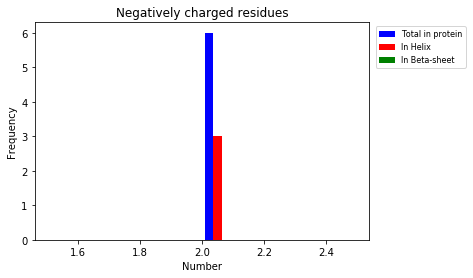

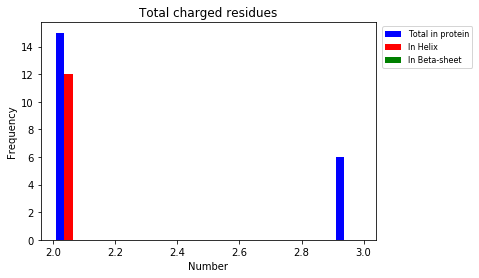

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
picture="1cud"
pdb=pd.read_csv(picture+'_modified.pdb',engine='python',skiprows=1,header=None,skipfooter=1,delim_whitespace=True,
                names=['a','b','c','res','e','f','g','h','i','j','k','l'])
sec_st=pd.read_csv(picture+'_sec_st.dat',skiprows=9,header=None,
                   names=['atomno.','chain','ref','residue','structure'],delimiter=' ')

aa=pdb['res'] ##This is the amino acid name fetched from pdb file
resno=pdb['f'] ##This is residue number fetched from pdb file
k=sec_st['structure'] ##Secondary structure data, fetched from timeline file
countpdb=pdb.shape[0]
countsecst=sec_st.shape[0]
print("Total amino acid residues in protein == %d"%(countsecst))

########****Description
##Part1: Saving the data of aminoacid vs Sec. structure: newdf
##Part2: Counting the total number of charged residues in protein: chcount
##Part3: Counting number of Charged amino acids occuring together, positives and negatives: zz
##Part4: Couting number of charged amino acids occuring together and are in helix and beta-sheet: xx, yy
##Part5: Counting number of similar charged residues which are together: pp, nn
##Part6: Couting number of similar charged amino acids occuring together and are in helix: xx1, xx2
##Part7: Couting number of similar charged amino acids occuring together and are in beta-sheet: xx3, xx4
##Part8: Calculating the fraction of residues in helix and beta sheets: totalhelixfr, totalbetafr, totalturnsfr

###Picking up  the names of aa from pdb file in amino-acid##
ii=0
jj=1
aminoacid=[]
while ii<countpdb-1:
    if resno[jj]!=resno[ii]:
        aminoacid.append(aa[ii])
    ii+=1
    jj+=1
aminoacid.append(aa[ii])
###############################################

##Part1:***************************************
##Saving the dat file with amino acid and structure
aminoacid1=pd.Series(aminoacid) ##converting the above list to pandas series
newdf=pd.concat([k, aminoacid1], axis=1) ##creating a new  DataFrame
newdf.columns=['Structure','Amino-acid'] ##renaming the series
#print(newdf.head())
newdf.to_csv(picture+".dat",sep=' ') ##saving the DataFrame
#################################################
###Closing part 1

##Part2:***************************************
##Counting the total number of charged residues in protein##
ax=0
namey= ['LYS','ARG','HIS','GLU','ASP']
##Counting total charged residues in the protein####
chcount=0
m2=0
while m2<countsecst-1:
    if aminoacid[m2] in namey:
        chcount+=1
    m2+=1
print('Total charged residues are: %d'%(chcount))
#################################################
###Closing part 2

##Part3:***************************************
##Counting number of Charged amino acids occuring together
m3=0
zz=[]
while m3<countsecst:
    q=1
    while m3<countsecst-1:
        if aminoacid[m3] in namey and aminoacid[m3+1] in namey:
            q+=1
            #print(m3,m3+1)
        else:
            break
        m3+=1
    if q!=1:
        zz.append(q)
    m3+=1
##########################################################
###Closing part 3

##Part4:***************************************
##Couting number of charged amino acids occuring together and are in helix and beta-sheet
namex=['LYS','ARG','HIS','GLU','ASP']
m1=0
xx=[]
while m1<countsecst:
        p=1
        while m1<countsecst-1:
            if k[m1]=='H' and k[m1+1]=='H' and aminoacid[m1] in namex and aminoacid[m1+1] in namex:
                p+=1
            else:
                break
            m1+=1
        ##print(p)
        if p!=1:
            xx.append(p)
        m1+=1
m1=0
yy=[]
p=0
while m1<countsecst:
        p=1
        while m1<countsecst-1:
            if k[m1]=='E' and k[m1+1]=='E' and aminoacid[m1] in namex and aminoacid[m1+1] in namex:
                p+=1
            else:
                break
            m1+=1
        if p!=1:
            yy.append(p)
        m1+=1
####################################################
###Closing part 4

##Part5:***************************************
##Counting number of similar charged residues which are together
m4=0
pp=[]
namep=['LYS','ARG','HIS']
while m4<countsecst:
    qqx=1
    while m4<countsecst-1:
        if aminoacid[m4] in namep and aminoacid[m4+1] in namep:
            qqx+=1
        else:
            break
        m4+=1
    if qqx!=1:
        pp.append(qqx)
    m4+=1
m5=0
nn=[]
namen=['ASP','GLU']
while m5<countsecst:
    qqy=1
    while m5<countsecst-1:
        if aminoacid[m5] in namen and aminoacid[m5+1] in namen:
            qqy+=1
        else:
            break
        m5+=1
    if qqy!=1:
        nn.append(qqy)
    m5+=1
#print("List of positive charged residues coming together %d"%(pp))
#print("List of negative charged residues coming together %d"%(nn))
#############################################################
###Closing part 5
print(chcount,zz,xx,pp,nn)

##Part6:***************************************
####Couting number of similar charged amino acids occuring together and are in helix
###Doing it for positively charged residues
m1=0
xx1=[]
p=0
while m1<countsecst:
        p=1
        while m1<countsecst-1:
            if k[m1]=='H' and k[m1+1]=='H' and aminoacid[m1] in namep and aminoacid[m1+1] in namep:
                p+=1
                #print(m1,m1+1)
            else:
                break
            m1+=1
        ##print(p)
        if p!=1:
            xx1.append(p)
        m1+=1
###Doing it for negatively charged residues
m2=0
xx2=[]
p=0
while m2<countsecst:
        p=1
        while m2<countsecst-1:
            if k[m2]=='H' and k[m2+1]=='H' and aminoacid[m2] in namen and aminoacid[m2+1] in namen:
                p+=1
                #print(m1,m1+1)
            else:
                break
            m2+=1
        ##print(p)
        if p!=1:
            xx2.append(p)
        m2+=1
#########################################################################
###Closing part 6

##Part7:***************************************
####Couting number of similar charged amino acids occuring together and are in beta-sheet
###Doing it for positively charged residues
m1=0
xx3=[]
p=0
while m1<countsecst:
        p=1
        while m1<countsecst-1:
            if k[m1]=='E' and k[m1+1]=='E' and aminoacid[m1] in namep and aminoacid[m1+1] in namep:
                p+=1
                #print(m1,m1+1)
            else:
                break
            m1+=1
        ##print(p)
        if p!=1:
            xx3.append(p)
        m1+=1
###Doing it for negatively charged residues
m2=0
xx4=[]
p=0
while m2<countsecst:
        p=1
        while m2<countsecst-1:
            if k[m2]=='E' and k[m2+1]=='E' and aminoacid[m2] in namen and aminoacid[m2+1] in namen:
                p+=1
                #print(m1,m1+1)
            else:
                break
            m2+=1
        ##print(p)
        if p!=1:
            xx4.append(p)
        m2+=1
#########################################################################
###Closing part 7

##Part8:***************************************
##Calculating the fraction of residues in helix and beta sheets##
bn=0
helix=0
beta=0
turns=0
while bn<countsecst:
    if k[bn]=='H':
        helix+=1
    elif k[bn]=='E':
        beta+=1
    else:
        turns+=1
    bn+=1
totalhelixfr=helix/countsecst
totalbetafr=beta/countsecst
totalturnsfr=turns/countsecst
print("Total fraction helix %.2f"%(totalhelixfr))
print("Total fraction beta %.2f"%(totalbetafr))
print("Total fraction other structures %.2f"%(totalturnsfr))
##################################################
###Closing part 8

#####Plotting the histogram#####
##
fig1 = plt.figure()
plot1 = fig1.add_subplot()
colors = ['b','r','g']
plot1.hist([pp,xx1,xx3], label=['Total in protein', 'In Helix','In Beta-sheet'],color=colors)
plot1.legend(bbox_to_anchor =(1.30, 1.00),loc='upper right',fontsize=8)
plot1.set_title("Positively charged residues")
plot1.set_xlabel("Number")
plot1.set_ylabel("Frequency")
fig1.savefig(picture+"_positive.png",bbox_inches='tight',dpi=300)
##
fig2 = plt.figure()
plot2 = fig2.add_subplot()
colors = ['b','r','g']
plot2.hist([nn,xx2,xx4], label=['Total in protein', 'In Helix','In Beta-sheet'],color=colors)
plot2.legend(bbox_to_anchor =(1.30, 1.00),loc='upper right',fontsize=8)
plot2.set_title("Negatively charged residues")
plot2.set_xlabel("Number")
plot2.set_ylabel("Frequency")
fig2.savefig(picture+"_negative.png",bbox_inches='tight',dpi=300)
##
fig3 = plt.figure()
plot3 = fig3.add_subplot()
colors = ['b','r','g']
plot3.hist([zz,xx,yy], label=['Total in protein', 'In Helix','In Beta-sheet'],color=colors)
plot3.legend(bbox_to_anchor =(1.30, 1.00),loc='upper right',fontsize=8)
plot3.set_title("Total charged residues")
plot3.set_xlabel("Number")
plot3.set_ylabel("Frequency")
fig3.savefig(picture+"_totalcharged.png",bbox_inches='tight',dpi=300)
###############################

##Putting data in misc file #####
misc=open(picture+'_misc.dat','w')
misc.write("Total amino acid in protein: %d \n"%(countsecst))
misc.write("Total charged amino-acid in protein: %d \n"%(chcount))
misc.write("Total number of residues in helix: %d \n"%(helix))
misc.write("Total fraction helix: %.2f \n"%(totalhelixfr))
misc.write("Total number of residues in beta-sheets: %d \n"%(beta))
misc.write("Total fraction beta-sheet: %.2f \n"%(totalbetafr))
misc.write("Total fraction other structures: %.2f \n"%(totalturnsfr))
misc.close()
#######################################

print("**It should generate 1 png, 2 dat (aa_vs_secst.dat and mist.dat) files")
print("ALL DONE")

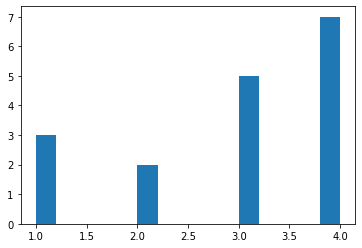

In [45]:
import matplotlib.pyplot as plt
XX
YY=[1,1,1,2,2,3,3,3,3,3,4,4,4,4,4,4,4]
gp= plt.hist(YY, bins=15) 

In [1]:
namex=['LYS','ARG','GLU','ARG']
if 'ARG' in namex:
    print('yes')

yes


In [5]:
1//3

0